In [42]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/masterdataframe.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13322 entries, 0 to 13321
Columns: 530 entries, date to precomp_recent_avg_ground_strikes_attempts_per_min
dtypes: float64(491), int64(25), object(14)
memory usage: 53.9+ MB


In [7]:
df.describe()

,result,total_comp_time,round,reach,height,age,knockdowns,sub_attempts,reversals,control,...,recent_avg_clinch_strikes_attempts_per_min,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min
count,13322.000000,13322.000000,13322.000000,12039.000000,13308.000000,13087.000000,13322.000000,13322.000000,13322.000000,13322.000000,...,9179.000000,7689.000000,13322.000000,11061.000000,9179.000000,7689.000000,13322.000000,11061.000000,9179.000000,7689.000000
mean,0.491142,628.426813,2.330431,72.136307,70.383228,37.109345,0.215283,0.402792,0.136991,131.914953,...,0.809267,0.833145,0.909553,0.976845,0.802686,0.858894,1.295839,1.390631,1.127832,1.206472
std,0.499940,365.103370,1.013957,4.176705,3.482012,6.217236,0.493830,0.852478,0.423131,174.784787,...,0.954325,0.972702,1.587399,1.687217,1.220934,1.273812,2.073595,2.196934,1.617614,1.683694
min,0.000000,5.000000,1.000000,58.000000,60.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.000000,1.000000,70.000000,68.000000,33.000000,0.000000,0.000000,0.000000,5.000000,...,0.284096,0.288889,0.200000,0.233333,0.142540,0.167901,0.300000,0.345762,0.214003,0.244444
50%,0.000000,794.000000,3.000000,72.000000,71.000000,37.000000,0.000000,0.000000,0.000000,57.000000,...,0.568116,0.587569,0.535997,0.592045,0.422222,0.466667,0.796219,0.867907,0.618557,0.668380
75%,1.000000,900.000000,3.000000,75.000000,73.000000,41.000000,0.000000,1.000000,0.000000,195.000000,...,1.017945,1.045211,1.078072,1.153730,0.978280,1.047863,1.570326,1.679185,1.394168,1.510555
max,1.000000,2160.000000,5.000000,84.000000,83.000000,79.000000,5.000000,10.000000,5.000000,1342.000000,...,16.196825,16.196825,48.000000,48.000000,16.170940,16.170940,51.428571,51.428571,23.593461,23.593461


**FRACTION OF FIGHTS PER DIVISION**

In [135]:
df.division.value_counts()//2

Lightweight              1181
Welterweight             1162
Middleweight              897
Heavyweight               633
Featherweight             626
Light Heavyweight         611
Bantamweight              549
Flyweight                 262
Women's Strawweight       235
Women's Bantamweight      169
Women's Flyweight         165
Open Weight               102
Catch Weight               45
Women's Featherweight      23
Super Heavyweight           1
Name: division, dtype: int64

**NUMBER OF MATCHES IN WOMEN'S DIVISION AND IT DISTRIBUTION ACROSS THE YEARS**

In [79]:
women_count = df[df['division'].str.contains('women', case=False, regex=True)].shape[0]

print("Number of rows with 'women' in the 'division' column:", women_count/2)

Number of rows with 'women' in the 'division' column: 592.0


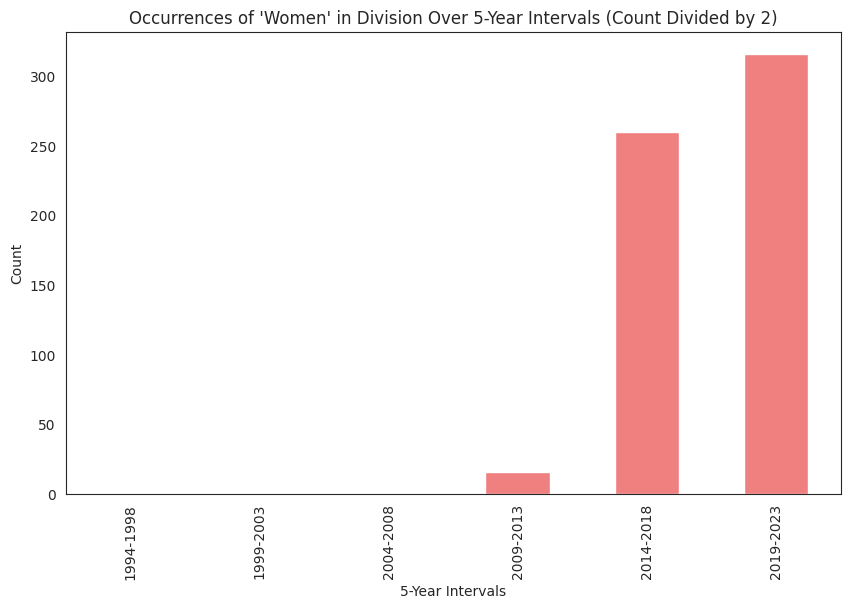

In [78]:
import pandas as pd
import matplotlib.pyplot as plt


df_analysis = df.copy()

df_analysis['date'] = pd.to_datetime(df_analysis['date'], errors='coerce')
df_analysis['year'] = df_analysis['date'].dt.year

bins = range(df_analysis['year'].min(), df_analysis['year'].max() + 6, 5)
df_analysis['year_interval'] = pd.cut(df_analysis['year'], bins, right=False, labels=[f"{i}-{i+4}" for i in bins[:-1]])

women_count_by_year = df_analysis[df_analysis['division'].str.contains('women', case=False, regex=True)].groupby('year_interval').size()

women_count_by_year /= 2

plt.figure(figsize=(10, 6))
women_count_by_year.plot(kind='bar', color='lightcoral')
plt.title("Occurrences of 'Women' in Division Over 5-Year Intervals (Count Divided by 2)")
plt.xlabel("5-Year Intervals")
plt.ylabel("Count")
plt.show()


**DISTRIBUTION OF FIGHTS ACROSS THE YEARS FOR DIFFERENT GENDERS (MALE AND FEMALE)**

<Figure size 1000x600 with 0 Axes>

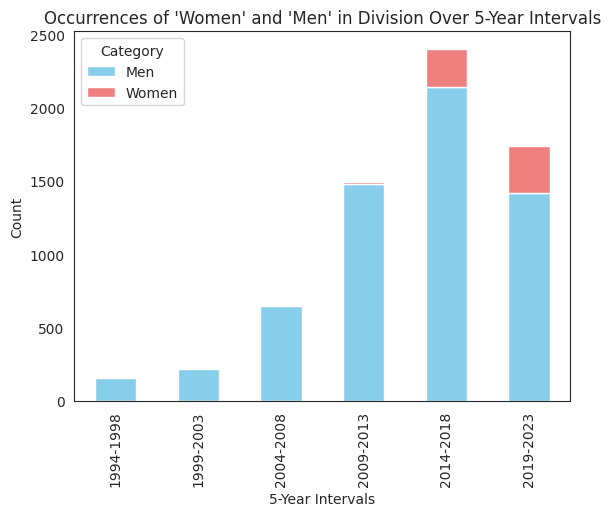

In [83]:
import pandas as pd
import matplotlib.pyplot as plt



df_analysis = df.copy()

df_analysis['date'] = pd.to_datetime(df_analysis['date'], errors='coerce')
df_analysis['year'] = df_analysis['date'].dt.year

bins = range(df_analysis['year'].min(), df_analysis['year'].max() + 6, 5)
df_analysis['year_interval'] = pd.cut(df_analysis['year'], bins, right=False, labels=[f"{i}-{i+4}" for i in bins[:-1]])

df_analysis['category'] = df_analysis['division'].apply(lambda x: 'Women' if 'women' in x.lower() else 'Non-Women')

category_count_by_year = df_analysis.groupby(['year_interval', 'category']).size().unstack(fill_value=0)

category_count_by_year //= 2

plt.figure(figsize=(10, 6))
category_count_by_year.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title("Occurrences of 'Women' and 'Men' in Division Over 5-Year Intervals")
plt.xlabel("5-Year Intervals")
plt.ylabel("Count")
plt.legend(title='Category', loc='upper left', labels=['Men', 'Women'])
plt.show()


**DISTRIBUTION OF DECISION METHOD FOR FIGHT RESULTS (ALONG DIVISIONS)**

In [85]:
import pandas as pd



filtered_df = df[df['method'].isin(['KO/TKO', 'SUB'])]


result_df = pd.DataFrame()


for division in filtered_df['division'].unique():

    gender_category = 'Men' if 'Women' not in division else 'Women'


    division_data = filtered_df[filtered_df['division'] == division]


    counts = division_data['method'].value_counts()//2


    result_df = result_df.append({
        'division': division,
        'gender': gender_category,
        'KO/TKO': counts.get('KO/TKO', 0),
        'SUB': counts.get('SUB', 0)
    }, ignore_index=True)

print(result_df)



                 division gender  KO/TKO  SUB
0             Open Weight    Men      45   47
1             Lightweight    Men     329  271
2             Heavyweight    Men     341   96
3            Middleweight    Men     333  199
4            Welterweight    Men     377  216
5       Super Heavyweight    Men       1    0
6       Light Heavyweight    Men     266  104
7            Catch Weight    Men      13   11
8           Featherweight    Men     165  101
9            Bantamweight    Men     156  114
10              Flyweight    Men      59   50
11   Women's Bantamweight  Women      42   24
12    Women's Strawweight  Women      28   48
13      Women's Flyweight  Women      31   36
14  Women's Featherweight  Women       7    5


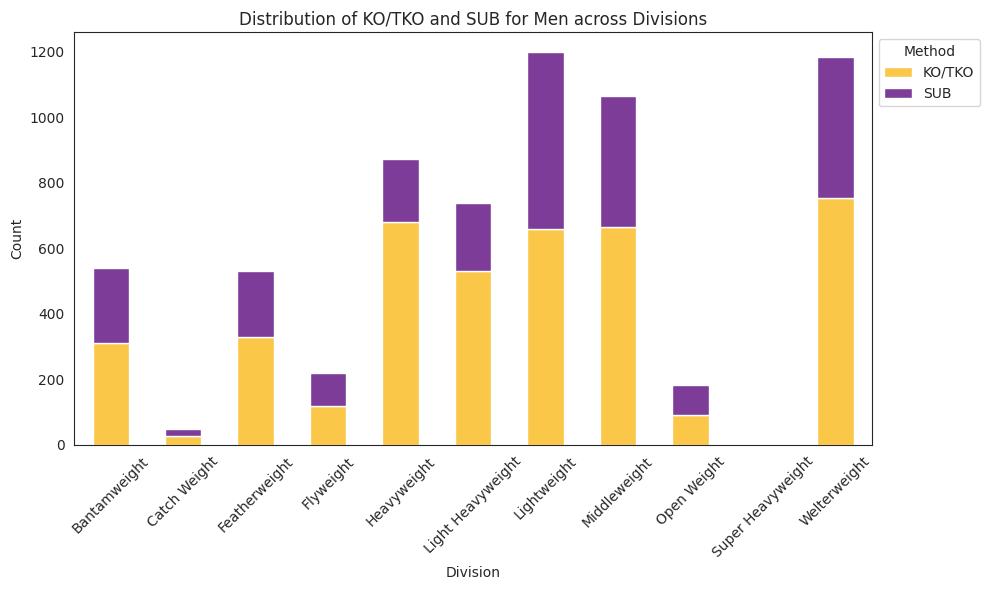

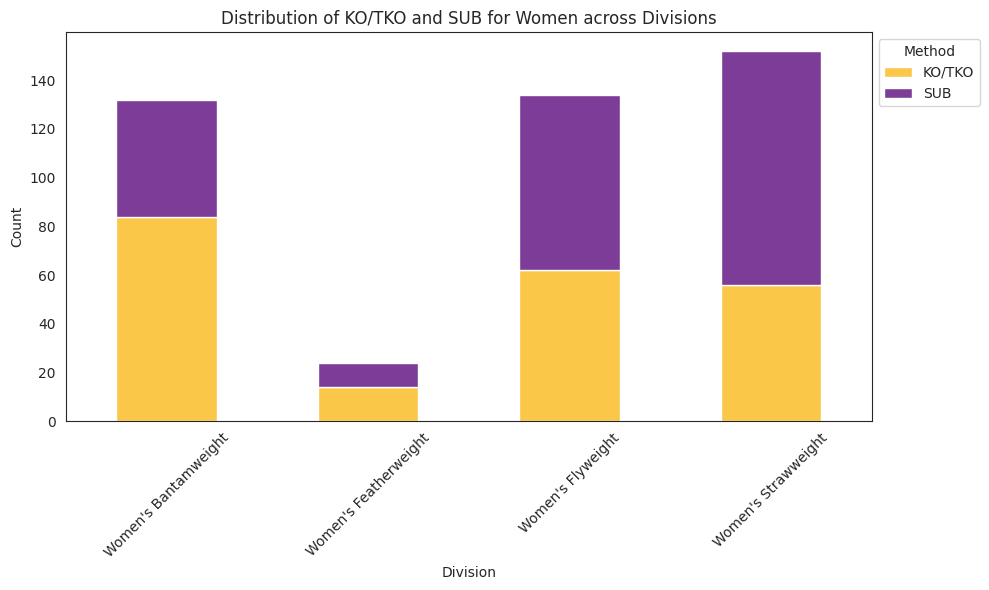

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df[df['method'].isin(['KO/TKO', 'SUB'])]


result_df = pd.DataFrame()


for division in filtered_df['division'].unique():

    gender_category = 'Men' if 'Women' not in division else 'Women'


    division_data = filtered_df[filtered_df['division'] == division]


    counts = division_data['method'].value_counts()

    result_df = result_df.append({
        'division': division,
        'gender': gender_category,
        'KO/TKO': counts.get('KO/TKO', 0),
        'SUB': counts.get('SUB', 0)
    }, ignore_index=True)

custom_palette = sns.color_palette(['#FAC748', '#7D3C98'])
sns.set_palette(custom_palette)


# Plot for Men
men_df = result_df[result_df['gender'] == 'Men']
fig, ax1 = plt.subplots(figsize=(10, 6))
men_df.groupby('division').sum().plot(kind='bar', stacked=True, ax=ax1, color =custom_palette )
plt.title('Distribution of KO/TKO and SUB for Men across Divisions')
plt.xlabel('Division')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Method', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#Plot for Women
women_df = result_df[result_df['gender'] == 'Women']
fig, ax2 = plt.subplots(figsize=(10, 6))
women_df.groupby('division').sum().plot(kind='bar', stacked=True, ax=ax2)
plt.title('Distribution of KO/TKO and SUB for Women across Divisions')
plt.xlabel('Division')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Method', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


**Duration of the match vs the method of ending**

In [90]:
filtered_df = df_analysis[df_analysis['method'].isin(['KO/TKO', 'SUB'])]
df1 = filtered_df.groupby('year')['method'].value_counts(normalize=True)/2

In [91]:
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

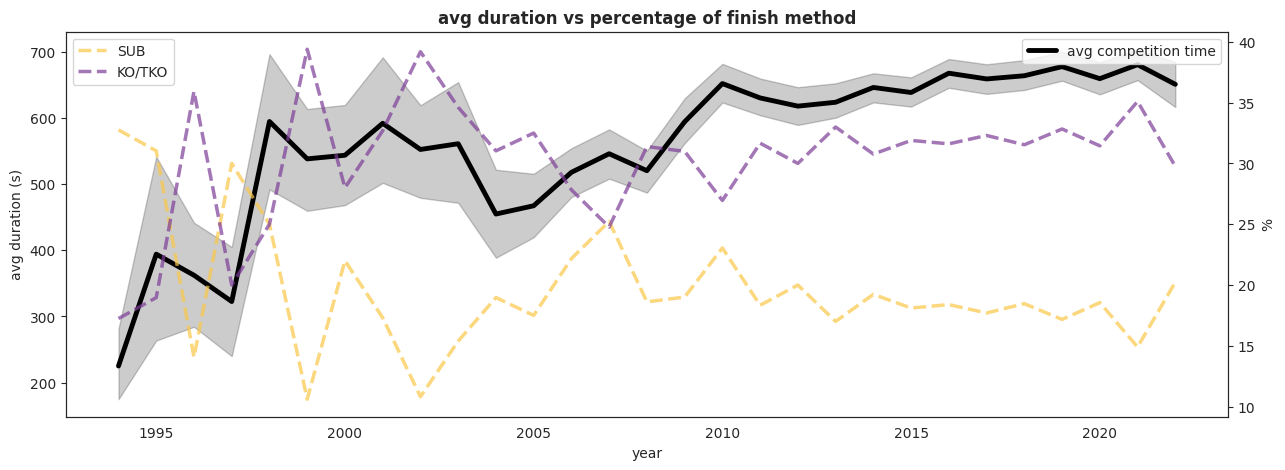

In [92]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(15,5))
g = sns.lineplot(x="year", y="total_comp_time", data=df_analysis, color='black', ax=ax,linewidth = 3.5, label = "avg competition time" )
ax1=ax.twinx()
g1 = sns.lineplot(x="year",y='percent', hue ="method",data=df1,  markers=True, dashes=False, linewidth = 2.5, ax=ax1,alpha=0.7,linestyle='--')
g.set_title("avg duration vs percentage of finish method",weight='bold')
ax1.legend(loc="upper left")
ax.set(ylabel='avg duration (s)')
ax1.set(ylabel='%')
plt.xticks(rotation=90)
plt.show()


**Distribution of number of fights across age**

In [102]:
age_data=df.copy()

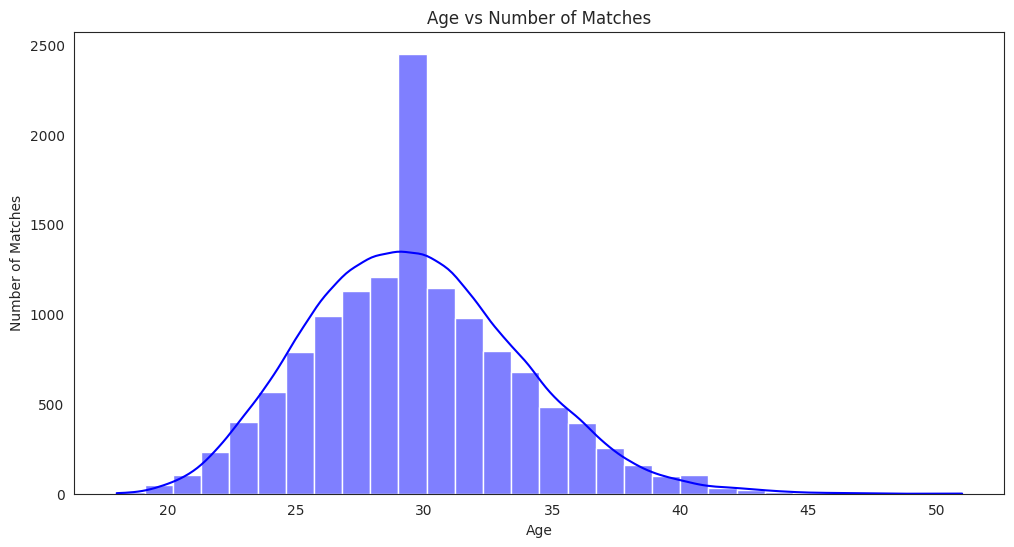

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age_data['dob'] = pd.to_datetime(age_data['dob'])
age_data['date'] = pd.to_datetime(age_data['date'])

age_data['age'] = (age_data['date'] - age_data['dob']).astype('<m8[Y]')

result_counts = age_data.groupby('age')['result'].count().reset_index()

# Plot histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(age_data['age'], kde=True, color='blue', bins=30)
plt.title('Age vs Number of Matches')
plt.xlabel('Age')
plt.ylabel('Number of Matches')
plt.show()


**DISTRIBUTION OF FIGHTS ACROSS THE DIVSION FOR DIFFRENT GENDERS**

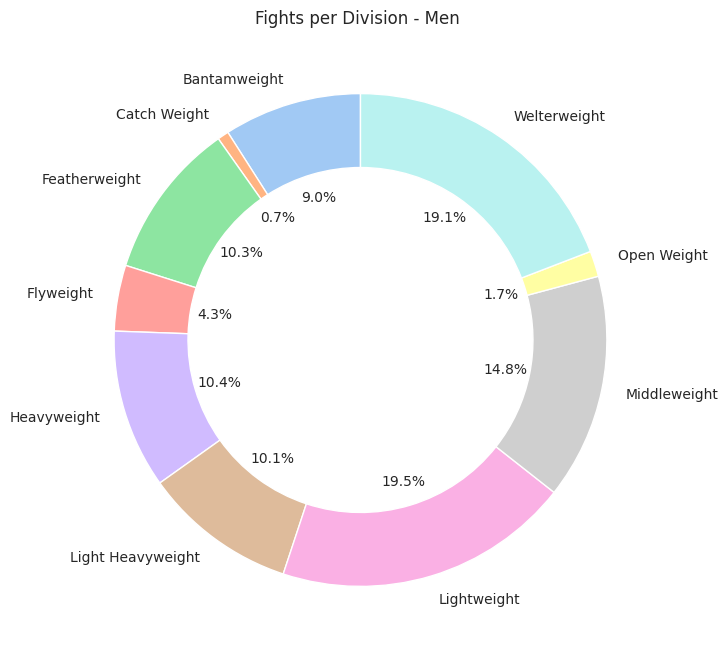

In [150]:
# Ignoring the Super Heavyweight because of its negligible contribution

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age_data['category'] = age_data['division'].apply(lambda x: 'Women' if 'women' in x.lower() else 'Men')

division_counts = age_data.groupby(['category', 'division']).size().reset_index(name='fight_count')

men_data = division_counts[division_counts['category'] == 'Men']
women_data = division_counts[division_counts['category'] == 'Women']

men_data = men_data[men_data['division'] != 'Super Heavyweight']

plt.figure(figsize=(8, 8))
plt.pie(men_data['fight_count'], labels=men_data['division'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Fights per Division - Men ')
plt.show()

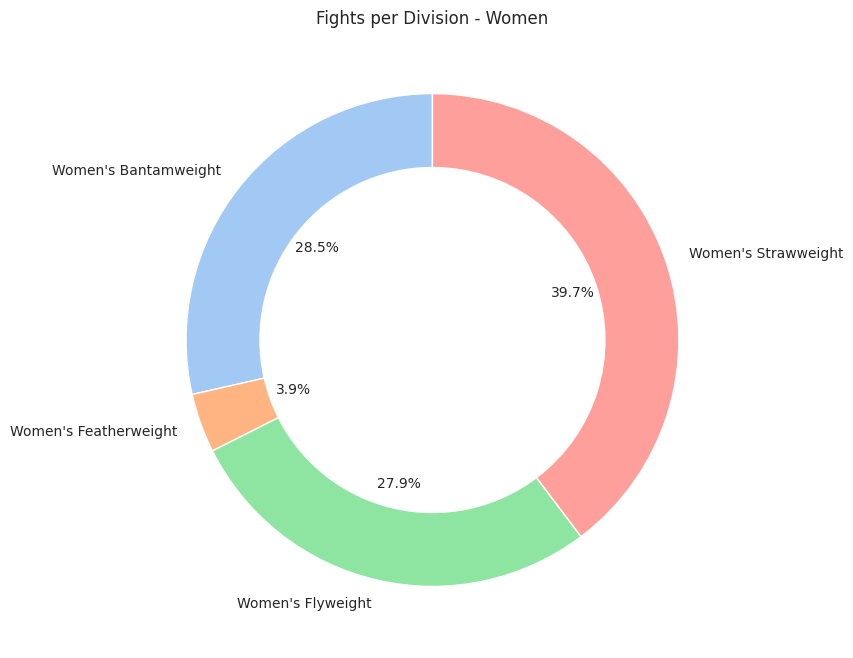

In [151]:
plt.figure(figsize=(8, 8))
plt.pie(women_data['fight_count'], labels=women_data['division'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Fights per Division - Women')
plt.show()


**bold text**

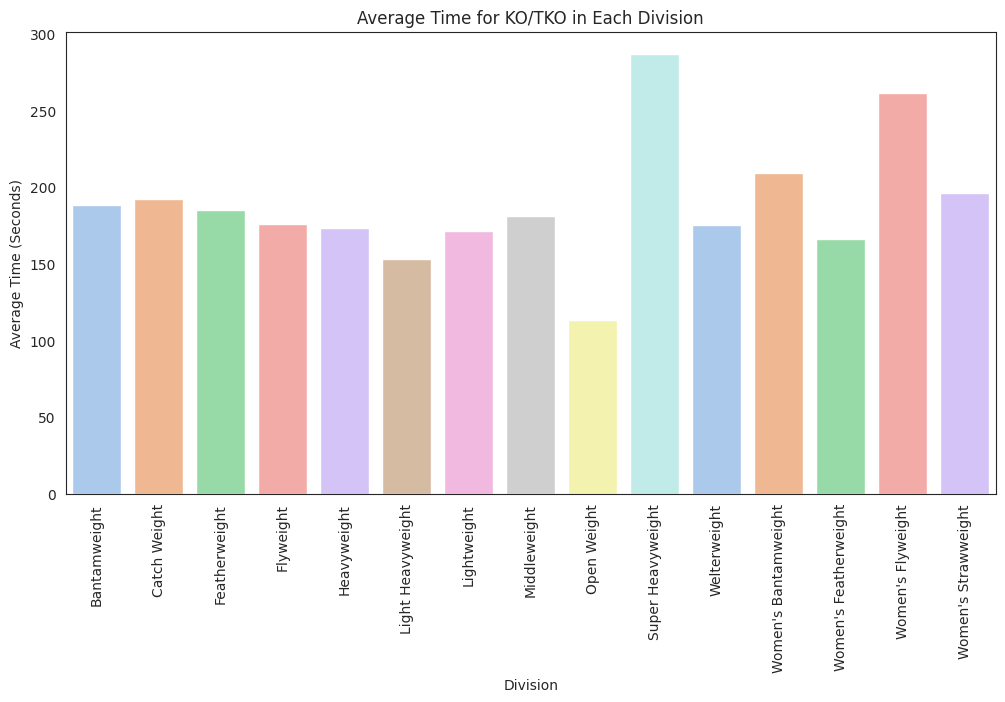

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the data for KO/TKO
ko_tko_data = age_data[age_data['method'] == 'KO/TKO']

average_time_per_division = ko_tko_data.groupby('division')['total_comp_time'].mean().reset_index()
average_time_per_division['total_comp_time'] //= 2

# Plot bar chart for average time per division
plt.figure(figsize=(12, 6))
sns.barplot(x='division', y='total_comp_time', data=average_time_per_division, palette='pastel')
plt.title('Average Time for KO/TKO in Each Division')
plt.xlabel('Division')
plt.ylabel('Average Time (Seconds)')
plt.xticks(rotation=90)
plt.show()


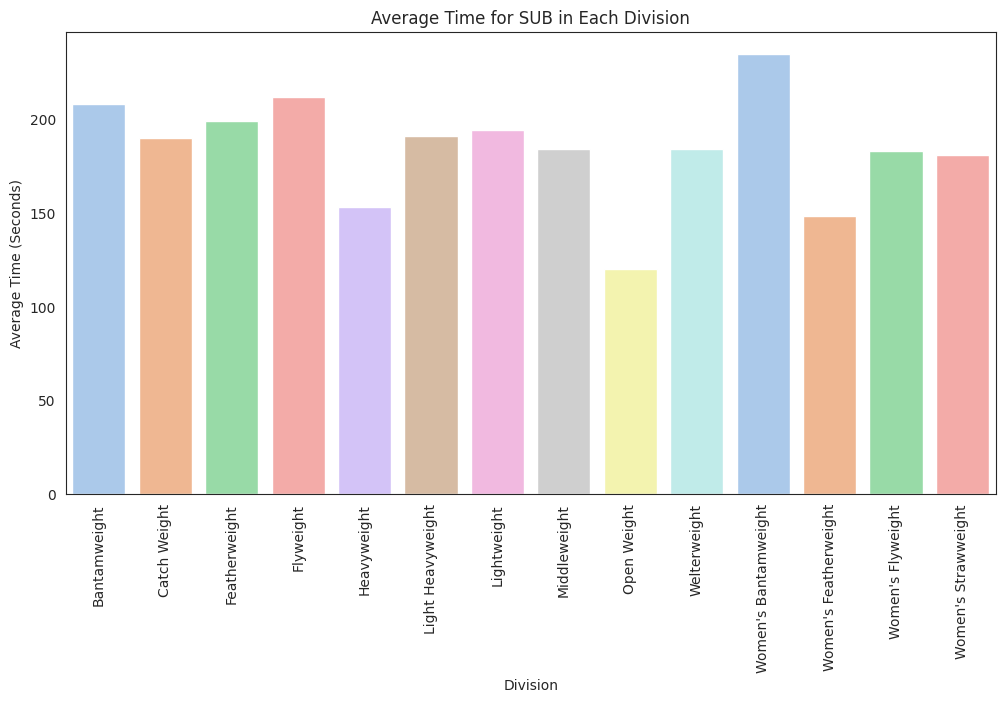

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the data for SUB
sub_data = age_data[age_data['method'] == 'SUB']

average_time_per_division = sub_data.groupby('division')['total_comp_time'].mean().reset_index()
average_time_per_division['total_comp_time'] //= 2

# Plot bar chart for average time per division
plt.figure(figsize=(12, 6))
sns.barplot(x='division', y='total_comp_time', data=average_time_per_division, palette='pastel')
plt.title('Average Time for SUB in Each Division')
plt.xlabel('Division')
plt.ylabel('Average Time (Seconds)')
plt.xticks(rotation=90)
plt.show()


**What is the match duration required for a knockout (KO) or submission across division?**

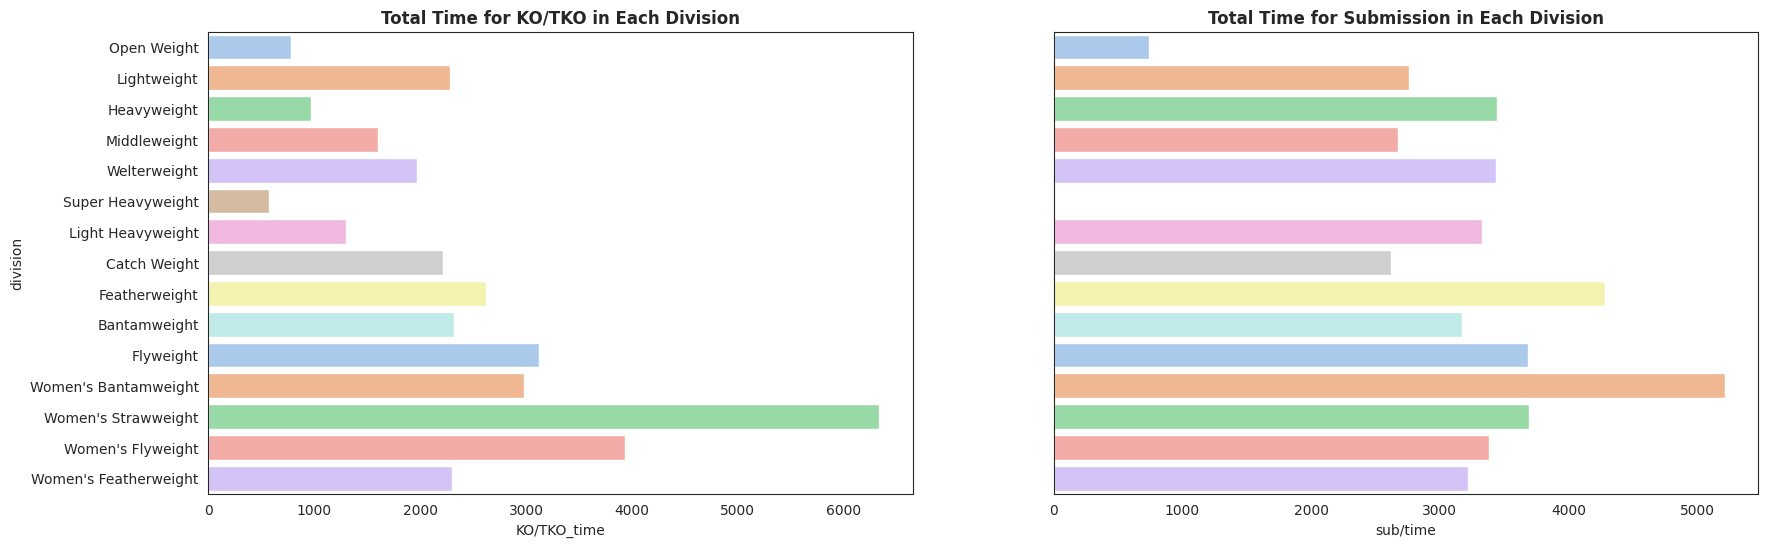

In [204]:
import numpy as np

weights = age_data['division'].unique()

pivot = age_data.pivot_table(values="result", index="division", columns="method", aggfunc="count", fill_value=0).apply(lambda x: x // 2)

pivot["total_fights"] = pivot.iloc[:, 0:7].sum(axis=1)
time_by_division = pd.DataFrame(age_data.groupby("division")["total_comp_time"].sum() // 2)
pivot = pivot.join(time_by_division)

pivot["sub/time"] = pivot["total_comp_time"] // pivot["SUB"]
pivot["KO/TKO_time"] = pivot["total_comp_time"] // pivot["KO/TKO"]

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 6))
g = sns.barplot(y=pivot.index, x="KO/TKO_time", data=pivot, order=weights, ax=axes[0], palette='pastel')
g1 = sns.barplot(y=pivot.index, x="sub/time", data=pivot, order=weights, ax=axes[1], palette='pastel')
axes[0].set_title('Total Time for KO/TKO in Each Division', weight='bold')
axes[1].set_title('Total Time for Submission in Each Division', weight='bold')
g1.set_ylabel('')
plt.show()
